In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [ ]:

dfTrain=pd.read_csv("/content/drive/MyDrive/Tensorflow/HousePrices/train.csv")


# **DATA ANALYSIS**

In [ ]:
dfTrain.shape


(1460, 81)

In [ ]:
dfTrain.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


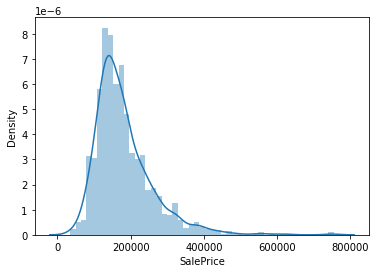

In [ ]:
sbn.distplot(dfTrain["SalePrice"])

In [ ]:
dfTrain=dfTrain[dfTrain.SalePrice <=400000]
dfTrain.shape

(1432, 81)

In [ ]:
(dfTrain.isna().sum()/dfTrain.shape[0]).sort_values()


Id               0.000000
TotalBsmtSF      0.000000
Heating          0.000000
SaleCondition    0.000000
CentralAir       0.000000
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
FullBath         0.000000
HalfBath         0.000000
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
KitchenQual      0.000000
TotRmsAbvGrd     0.000000
Functional       0.000000
SaleType         0.000000
YrSold           0.000000
MoSold           0.000000
MiscVal          0.000000
PoolArea         0.000000
ScreenPorch      0.000000
BsmtUnfSF        0.000000
3SsnPorch        0.000000
OpenPorchSF      0.000000
WoodDeckSF       0.000000
PavedDrive       0.000000
GarageArea       0.000000
GarageCars       0.000000
Fireplaces       0.000000
EnclosedPorch    0.000000
BsmtFinSF2       0.000000
HeatingQC        0.000000
SalePrice        0.000000
LandSlope        0.000000
LandContour      0.000000
LotShape    

In [ ]:
feature_with_na = [feature for feature in dfTrain.columns if dfTrain[feature].isnull().sum()>1]

In [ ]:
numerical_feature = [feature for feature in dfTrain.columns if dfTrain[feature].dtypes != 'O']
print('Number of numerical variables : ',len(numerical_feature))
dfTrain[numerical_feature].head()

Number of numerical variables :  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
Target = 'SalePrice'
dfTrain.dropna(axis=0, subset=[Target], inplace=True)

In [ ]:
data=dfTrain

print('train df has {} rows and {} features'.format(dfTrain.shape[0],dfTrain.shape[1]))
print('test df has {} rows and {} features'.format(dfTest.shape[0],dfTest.shape[1]))
print('Combined df has {} rows and {} features'.format(data.shape[0],data.shape[1]))

train df has 1432 rows and 81 features
test df has 1459 rows and 80 features
Combined df has 1432 rows and 81 features


In [ ]:
dfTrain = dfTrain[dfTrain.columns[dfTrain.isna().sum()/dfTrain.shape[0] < 0.8]]


In [ ]:
data=data.drop(columns=["Id"],axis=1)

In [ ]:
def missingValuesInfo(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100, 2)
    temp = pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])
    return temp.loc[(temp['Total'] > 0)]

missingValuesInfo(dfTrain)

,Total,Percent
FireplaceQu,690,48.18
LotFrontage,257,17.95
GarageType,81,5.66
GarageYrBlt,81,5.66
GarageFinish,81,5.66
GarageQual,81,5.66
GarageCond,81,5.66
BsmtExposure,38,2.65
BsmtFinType2,38,2.65
BsmtQual,37,2.58


# **DATA CLEANING AND PREPARATION**

In [ ]:
# Missing Value Handling

def HandleMissingValues(df):
    # for Object columns fill using 'Missing'
    # for Numeric columns fill using median
    num_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
    cat_cols = [cname for cname in df.columns if df[cname].dtype == "object"]
    values = {}
    for a in cat_cols:
        values[a] = 'Missing'

    for a in num_cols:
        values[a] = df[a].median()
        
    df.fillna(value=values,inplace=True)
    
    
HandleMissingValues(data)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


In [ ]:
# Check for any missing values
data.isnull().sum().sum()

0

In [ ]:
def getObjectColumnsList(df):
    return [cname for cname in df.columns if df[cname].dtype == "object"]

def PerformOneHotEncoding(df,columnsToEncode):
    return pd.get_dummies(df,columns = columnsToEncode)

cat_cols = getObjectColumnsList(data)
data = PerformOneHotEncoding(data,cat_cols)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Missing,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_Missing,Fence_GdPrv,Fence_GdWo,Fence_Missing,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Missing,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:

X=data
Y=dfTrain["SalePrice"].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=52)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)


MinMaxScaler()

In [ ]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)


# **MODEL IMPLEMANTATION**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import  EarlyStopping


model = Sequential()

model.add(Dense(units=288,activation="relu")) 
model.add(Dense(units=144,activation="relu"))
model.add(Dense(units=144,activation="relu"))
model.add(Dense(units=144,activation="relu"))

model.add(Dense(units=1))

model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])




In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),verbose=1,epochs=500)


Epoch 1/500
30/30 [==============================] - 1s 7ms/step - loss: 35698556928.0000 - mae: 176698.5625 - mse: 35698556928.0000 - val_loss: 32936437760.0000 - val_mae: 169995.1250 - val_mse: 32936437760.0000
Epoch 2/500
30/30 [==============================] - 0s 3ms/step - loss: 32173148160.0000 - mae: 166180.4844 - mse: 32173148160.0000 - val_loss: 21323513856.0000 - val_mae: 132188.8125 - val_mse: 21323513856.0000
Epoch 3/500
30/30 [==============================] - 0s 3ms/step - loss: 9357789184.0000 - mae: 75987.4531 - mse: 9357789184.0000 - val_loss: 3845366272.0000 - val_mae: 53951.6641 - val_mse: 3845366272.0000
Epoch 4/500
30/30 [==============================] - 0s 4ms/step - loss: 3004258304.0000 - mae: 41464.2383 - mse: 3004258304.0000 - val_loss: 2273661696.0000 - val_mae: 38138.9219 - val_mse: 2273661696.0000
Epoch 5/500
30/30 [==============================] - 0s 3ms/step - loss: 2275528960.0000 - mae: 36918.8789 - mse: 2275528960.0000 - val_loss: 1747374208.0000 - 

# **TESTING AND ACCURACY RESULTS**

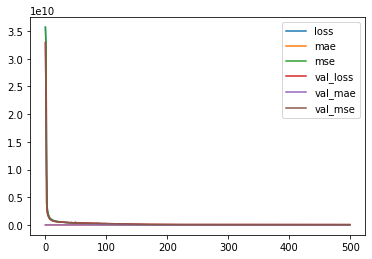

In [ ]:
pd.DataFrame(model.history.history).plot()

In [ ]:
results = model.evaluate(X_test, y_test)

15/15 [==============================] - 0s 2ms/step - loss: 59914808.0000 - mae: 5605.1772 - mse: 59914808.0000


In [ ]:
prediction=model.predict(X_test)

15/15 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_absolute_error(y_test,prediction)

5605.177490750529

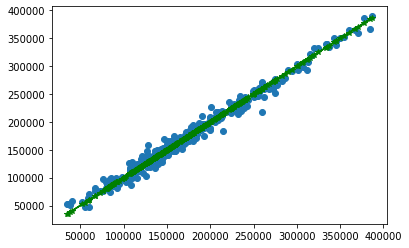

In [ ]:
plt.scatter(y_test,prediction)
plt.plot(y_test,y_test,"g-*")